In [83]:
import pandas as pd 
import numpy as np 
import os 

In [84]:
# file paths

raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_data_path = os.path.join(raw_data_path, 'train.csv')
test_data_path = os.path.join(raw_data_path, 'test.csv')

In [85]:
train_df = pd.read_csv(train_data_path, index_col='PassengerId')
test_df = pd.read_csv(test_data_path, index_col='PassengerId')

In [86]:
df = pd.concat((train_df, test_df), axis=0)

# Distributions 

<AxesSubplot:title={'center':'histogram for Age'}, ylabel='Frequency'>

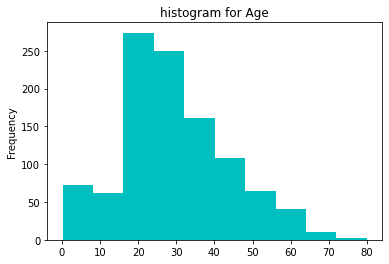

In [87]:
df.Age.plot(kind='hist', title='histogram for Age', color='c')

<AxesSubplot:title={'center':'histogram for Age'}, ylabel='Frequency'>

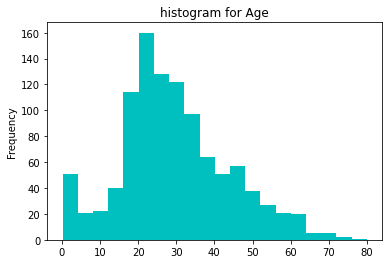

In [88]:
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20)

<AxesSubplot:title={'center':'histogram for Age'}, ylabel='Density'>

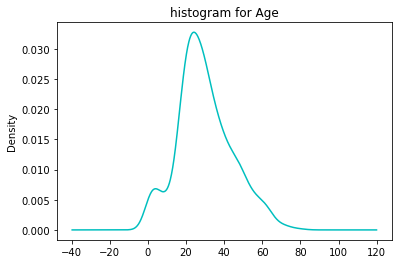

In [89]:
df.Age.plot(kind='kde', title='histogram for Age', color='c')

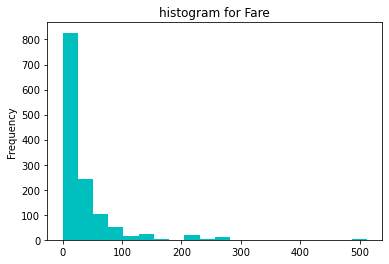

In [90]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [91]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


# Scatter plot

<AxesSubplot:title={'center':'scatter plot : Age vs Fare'}, xlabel='Age', ylabel='Fare'>

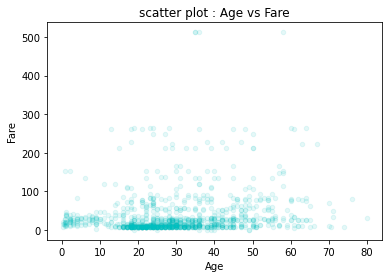

In [92]:
# use alpha to set the transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare', alpha=0.1)

<AxesSubplot:title={'center':'Scatter plot : Passenger class vs Fare'}, xlabel='Pclass', ylabel='Fare'>

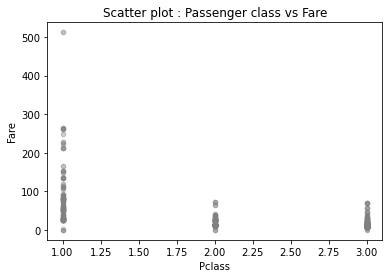

In [93]:
df.plot.scatter(x='Pclass', y='Fare', color='gray', title='Scatter plot : Passenger class vs Fare', alpha=0.15)

# Grouping and Aggregations

In [94]:
# group by 
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [95]:
# group by 
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [96]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [97]:
df.groupby(['Pclass'])['Fare','Age'].median()

<ipython-input-97-9e50b1515a06>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Pclass'])['Fare','Age'].median()


,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [98]:
# Aggregate different types of distributions / stats by columns. 
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [99]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [100]:
# https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html#named-aggregation 
# This changed, not sure of a cleaner way to do this just yet though. 
( df.groupby(['Pclass'])
  .agg(
    mean_fare=pd.NamedAgg(column='Fare', aggfunc='mean'),
    median_fare=pd.NamedAgg(column='Fare', aggfunc='median'),
    max_fare=pd.NamedAgg(column='Fare', aggfunc=max),
    min_fare=pd.NamedAgg(column='Fare', aggfunc=np.min),
    mean_age=pd.NamedAgg(column='Age', aggfunc='mean'),
    median_age=pd.NamedAgg(column='Age', aggfunc='median'),
    max_age=pd.NamedAgg(column='Age', aggfunc=max),
    min_age=pd.NamedAgg(column='Age', aggfunc=np.min)
  )
)

,mean_fare,median_fare,max_fare,min_fare,mean_age,median_age,max_age,min_age
Pclass,,,,,,,,
1,87.508992,60.0000,512.3292,0.0,39.159930,39.0,80.0,0.92
2,21.179196,15.0458,73.5000,0.0,29.506705,29.0,70.0,0.67
3,13.302889,8.0500,69.5500,0.0,24.816367,24.0,74.0,0.17


In [101]:
( df.groupby(['Pclass'])
  .agg(
    mean_fare=pd.NamedAgg('Fare', 'mean'),
    median_fare=pd.NamedAgg('Fare', 'median'),
    max_fare=pd.NamedAgg('Fare', max),
    min_fare=pd.NamedAgg('Fare', np.min),
    mean_age=pd.NamedAgg('Age', 'mean'),
    median_age=pd.NamedAgg('Age', 'median'),
    max_age=pd.NamedAgg('Age', max),
    min_age=pd.NamedAgg('Age', np.min)
  )
)

,mean_fare,median_fare,max_fare,min_fare,mean_age,median_age,max_age,min_age
Pclass,,,,,,,,
1,87.508992,60.0000,512.3292,0.0,39.159930,39.0,80.0,0.92
2,21.179196,15.0458,73.5000,0.0,29.506705,29.0,70.0,0.67
3,13.302889,8.0500,69.5500,0.0,24.816367,24.0,74.0,0.17


In [102]:
( df.groupby(['Pclass']).Fare
  .agg(
    mean_fare='mean',
    median_fare='median',
    max_fare=max,
    min_fare=np.min,
  )
)

,mean_fare,median_fare,max_fare,min_fare
Pclass,,,,
1,87.508992,60.0000,512.3292,0.0
2,21.179196,15.0458,73.5000,0.0
3,13.302889,8.0500,69.5500,0.0


In [109]:
# Another aggregation method for renaming the columns. 
# Not the same as above, but good to know about 
( df.groupby(['Pclass'])[['Fare', 'Age']].agg(['mean', 'median', max, np.min])
            .rename(columns={'mean': 'foo',
                            'median': 'bar',
                            'max': 'bar',
                            'amin': 'baz'}
                            )

)

Fare                                Age                  
              foo      bar       bar  baz        foo   bar   bar   baz
Pclass                                                                
1       87.508992  60.0000  512.3292  0.0  39.159930  39.0  80.0  0.92
2       21.179196  15.0458   73.5000  0.0  29.506705  29.0  70.0  0.67
3       13.302889   8.0500   69.5500  0.0  24.816367  24.0  74.0  0.17

In [110]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

# Crosstabs

In [112]:
# crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


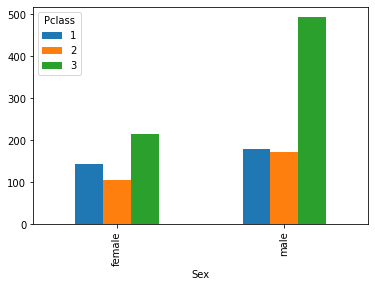

In [114]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

# Pivots 

In [116]:
# pivot table
df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [118]:
# Stacked 

df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [120]:
## allows the groupby with the tabular format ( unstack vs stacked )
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264
